<a href="https://colab.research.google.com/github/ganeshlucky07/AI-DRIVEN_CYBER_THREATS_PREDICTION-AI-AGENT/blob/main/Python_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn seaborn matplotlib


Sample Dataset Preview:


,source_ip,destination_ip,port,protocol,failed_logins,malware_flag
0,192.168.1.39,10.0.0.37,556,TCP,0,0
1,192.168.1.29,10.0.0.36,320,ICMP,0,0
2,192.168.1.15,10.0.0.24,262,UDP,7,0
3,192.168.1.43,10.0.0.31,141,ICMP,2,0
4,192.168.1.8,10.0.0.6,166,UDP,5,1



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       185
           1       0.11      0.07      0.08        15

    accuracy                           0.89       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.87      0.89      0.88       200


Confusion Matrix:


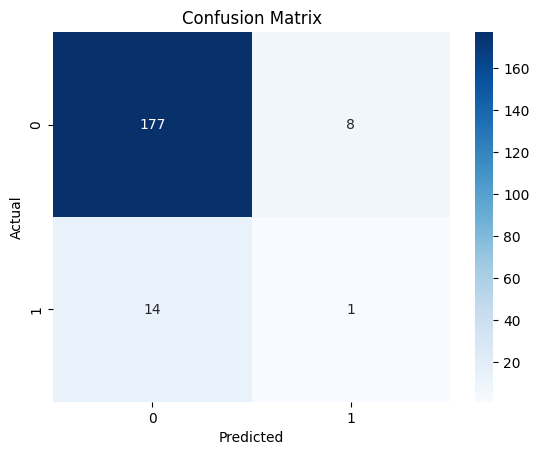

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sample Log Prediction: Safe


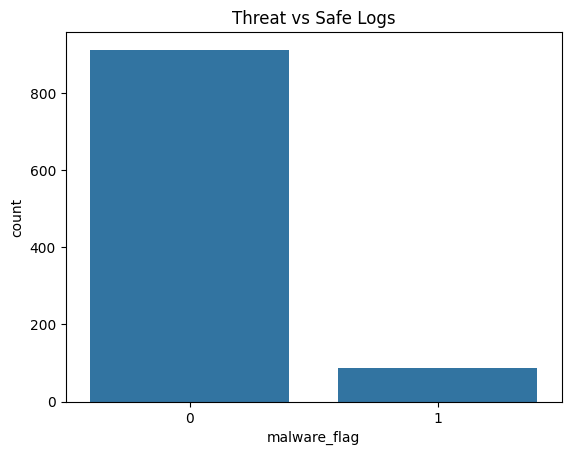

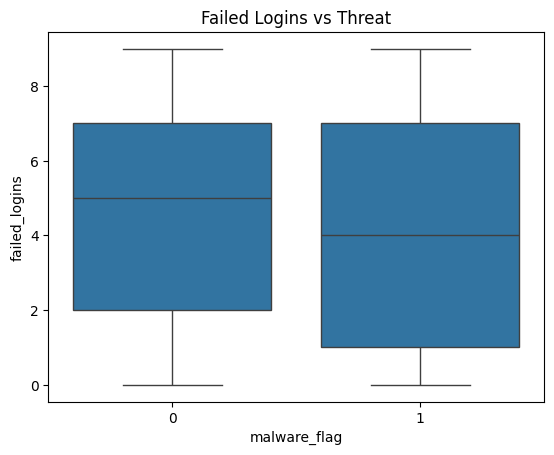

In [ ]:
# AI-Driven Cybersecurity Threat Prediction - Google Colab Version

# Install packages (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ensure plots display inline
%matplotlib inline

# ---------------------------
# Step 1: Simulate Sample Dataset
# ---------------------------
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'source_ip': np.random.choice(['192.168.1.' + str(i) for i in range(1, 50)], n_samples),
    'destination_ip': np.random.choice(['10.0.0.' + str(i) for i in range(1, 50)], n_samples),
    'port': np.random.randint(20, 1024, n_samples),
    'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], n_samples),
    'failed_logins': np.random.randint(0, 10, n_samples),
    'malware_flag': np.random.choice([0, 1], n_samples, p=[0.9, 0.1])
})

print("Sample Dataset Preview:")
display(data.head())

# ---------------------------
# Step 2: Data Preprocessing
# ---------------------------
le_protocol = LabelEncoder()
data['protocol_encoded'] = le_protocol.fit_transform(data['protocol'])

X = data[['port', 'failed_logins', 'protocol_encoded']]
y = data['malware_flag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Step 3: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 4: Model Training
# ---------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# Step 5: Model Evaluation
# ---------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ---------------------------
# Step 6: Threat Prediction Function
# ---------------------------
def predict_threat(log_entry):
    log_scaled = scaler.transform([log_entry])
    prediction = model.predict(log_scaled)
    return "Threat" if prediction[0] == 1 else "Safe"

# Example prediction
sample_log = [80, 3, le_protocol.transform(['TCP'])[0]]
print("Sample Log Prediction:", predict_threat(sample_log))

# ---------------------------
# Step 7: EDA Visualizations
# ---------------------------
sns.countplot(x='malware_flag', data=data)
plt.title('Threat vs Safe Logs')
plt.show()

sns.boxplot(x='malware_flag', y='failed_logins', data=data)
plt.title('Failed Logins vs Threat')
plt.show()
